In [20]:
import gym
import numpy as np
import matplotlib.pyplot as plt


In [21]:
gym_id = "Blackjack-v0"
env = gym.make(gym_id)
action_space = env.action_space.n
obs_shape = tuple(dim.n for dim in env.observation_space.spaces)
gamma = 0.6
learning_rate = 0.1

In [22]:
class Agent:

    def __init__(self):
        self.value_table = np.zeros((obs_shape[0], obs_shape[1], obs_shape[2], action_space))

    def action(self, state, training=True):
        if training:
            return np.random.randint(0, action_space)
        else:
            return np.argmax(self.value_table[state[0]][state[1]][int(state[2])])

    def learn(self, state_actions, reward):
        for state_action in sorted(state_actions, reverse=True):
            state, action = state_action
            opp_card_dim = state[0]
            curr_count_dim = state[1]
            has_ace_dim = int(state[2])
            state_val = self.value_table[opp_card_dim][curr_count_dim][has_ace_dim][action]

            q_val = state_val + learning_rate * reward
            self.value_table[opp_card_dim][curr_count_dim][has_ace_dim][action] = q_val
            reward *= gamma

In [23]:
def run_game(player, episodes, training=True):
    # loss | draw | win
    results = list([0, 0, 0])
    summary_print_freq = 1000
    for episode in range(episodes):

        state = env.reset()
        reward = 0
        done = False
        sarsas = []
        while not done:
            action = player.action(state, training)
            next_state, reward, done, _ = env.step(action)

            sarsas.append((state, action))

            state = next_state

        results[int(reward) + 1] += 1
        player.learn(sarsas, reward)
        if summary_print_freq % episodes == 0:
            print("Episode: {}".format(episode))
            print("Win rate: {}".format(get_result_rate(sum(results), results[2])))
            print("Draw rate: {}".format(get_result_rate(sum(results), results[1])))
            print("Loss rate: {}\n\n".format(get_result_rate(sum(results), results[0])))

    return results

In [24]:
def get_result_rate(total, result_count):
    if result_count == 0:
        return 0
    return result_count / total


def get_autopct_perc():
    def get_perc(value):
        return '{p:.2f}%'.format(p=value)

    return get_perc

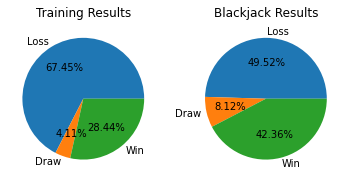

In [25]:
if __name__ == "__main__":
    player = Agent()
    training_results = run_game(player, 10000)
    test_results = run_game(player, 10000, training=False)

    plt.subplot(1, 2, 1)
    plt.pie(training_results, labels=["Loss", "Draw", "Win"], autopct=get_autopct_perc())
    plt.title("Training Results")
    plt.subplot(1, 2, 2)
    plt.pie(test_results, labels=["Loss", "Draw", "Win"], autopct=get_autopct_perc())
    plt.title("Blackjack Results")
    plt.savefig("blackjack_results_pie.png")